In [2]:
%matplotlib notebook
import numpy as np
from numba import jit
from potentials import *
from distances import *
from sampling import *
from vv import vvJ
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [3]:
def pot_gradient(coord, sig=1, eps=1):
    return gradients.LJ(coord, sig, eps) + gradients.harmonic(coord, r0 =(10, 10), k=5)
def pot(coord, pbc,sig=1, eps=1):
    return potentials.LJ(coord, sig, eps, pbc) + potentials.harmonic(coord, r0 =(10, 10),k=5)

In [4]:
r_init = mcmc(pot,50, 2, 10000, stepsize=0.01, beta=100, boxsize=(5,15))
v_init = np.zeros_like(r_init)
r_matrix, v_matrix, a_matrix=vvJ(pot_gradient, r_init, v_init, 1, 10, 0.001)

<IPython.core.display.Javascript object>


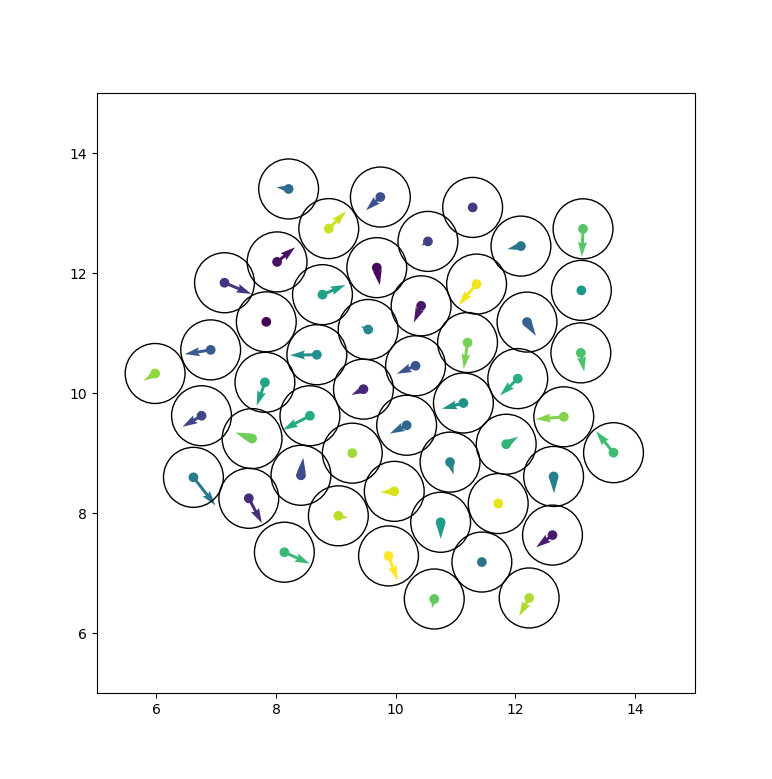

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
colors = np.arange(len(r_init))
scat = ax.scatter(r_init[:,0], r_init[:,1], c=colors)
circles = [plt.Circle(r, radius=0.5, fill=False) for i,r in enumerate(r_init)]
for c in circles:
    plt.gca().add_patch(c)
qax = ax.quiver(r_matrix[0,:,0], r_matrix[0,:,1], v_matrix[1,:,0], v_matrix[1,:,1],np.arange(len(r_init)),scale=50, width=0.005)
ax.set_xlim(5, 15)
ax.set_ylim(5, 15)
def animate(i):
    index = i
    data = r_matrix[index]
    scat.set_offsets(data)
    for i, c in enumerate(circles):
        c.center = data[i]
    qax.set_UVC(v_matrix[index,:,0],v_matrix[index,:,1])
    qax.set_offsets(data)
    return scat,

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=25, bitrate=1800)
anim = animation.FuncAnimation(fig, animate, interval=80, frames=750, repeat=False)
#anim.save('LJ_Harmonic_Particles.mp4', writer=writer)

In [11]:
print(r_matrix.shape)
print(r_init)

(10000, 50, 2)
[[ 8.06671872 11.68803083]
 [ 9.68070704 12.35993756]
 [ 7.44438577 12.45504072]
 [10.51873045 11.68640505]
 [12.95135584  7.99653401]
 [ 9.70692863 10.14425203]
 [ 6.42732853  8.39909243]
 [ 6.5091221  12.00753866]
 [11.68402255 13.09480826]
 [10.68887634 12.67540675]
 [ 7.30128433 10.18370949]
 [ 8.49761556  8.68426967]
 [ 9.97540303 13.38831878]
 [10.55136443 10.58510355]
 [ 7.18903324 11.20313023]
 [12.39510951 11.30545457]
 [10.32931746  9.46524388]
 [ 7.78043214 13.39551904]
 [12.01052911  7.55368686]
 [12.3723732  12.25804803]
 [ 6.67716722  9.41229637]
 [12.91065911  9.02537431]
 [11.17829847  8.98329769]
 [ 9.79622366 11.11431293]
 [ 8.96102094 10.6575908 ]
 [11.24148403  9.9609586 ]
 [13.2866274  11.8196995 ]
 [11.13023768  8.00875911]
 [ 8.99581453 11.68588436]
 [ 8.04436652 10.73876867]
 [ 8.53402757  9.77232928]
 [12.07605997 10.434227  ]
 [12.09274144  9.49562723]
 [ 7.47752409  8.24857747]
 [13.89071645  8.68681768]
 [13.40839517 10.83116769]
 [13.03041937